<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/ML/ImagePrediction/jsfastai-starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification - Kaggle

## 1. Import all Required packages

In [16]:
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.metrics import error_rate
import time
print("Import of requried Pkgs - Done : ", time.ctime())

Import of requried Pkgs - Done :  Wed Sep 18 07:45:32 2019


## 2. Copy data from GDrive to Notebook

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!ls drive/'My Drive'/images/

datakaggle.tar	sample_submission.csv  test  train


In [0]:
# !mkdir -p 'drive/data'  # error - mkdir: cannot create directory ‘drive/data’: Operation not supported
!mkdir -p data

In [20]:
start_time = time.time()
!cp -R drive/'My Drive'/images/datakaggle.tar data/
print("--- %s mins ---" % ((time.time() - start_time)/60))

--- 0.21441052357355753 mins ---


In [0]:
!cp drive/'My Drive'/images/sample_submission.csv data/sample_submission.csv

In [22]:
!ls data

datakaggle.tar	sample_submission.csv


In [0]:
start_time = time.time()
!tar -xvf data/datakaggle.tar
print("--- %s mins ---" % ((time.time() - start_time)/60))

In [24]:
help(fit_one_cycle)

Help on function fit_one_cycle in module fastai.train:

fit_one_cycle(learn:fastai.basic_train.Learner, cyc_len:int, max_lr:Union[float, Collection[float], slice]=slice(None, 0.003, None), moms:Tuple[float, float]=(0.95, 0.85), div_factor:float=25.0, pct_start:float=0.3, final_div:float=None, wd:float=None, callbacks:Union[Collection[fastai.callback.Callback], NoneType]=None, tot_epochs:int=None, start_epoch:int=None) -> None
    Fit a model following the 1cycle policy.



### 2.1 Content of the folder - datakaggle

In [25]:
!ls datakaggle

models	sample_submission.csv  test  train


## 3. Playing with the Data
<br>Folder datakaggle has all required files and folders

In [26]:
!ls datakaggle

models	sample_submission.csv  test  train


In [27]:
DATA_DIR = Path('datakaggle')
print("Data Dir(DATA_DIR): ", DATA_DIR)

Data Dir(DATA_DIR):  datakaggle


In [28]:
DATA_DIR/'train'

PosixPath('datakaggle/train')

In [29]:
bs = 64 #bs - Batch size
print("Batch size is : ", bs)
tfms = get_transforms(do_flip=False)
print("tfms : ", tfms)

Batch size is :  64
tfms :  ([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True), RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True)], [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.

In [30]:
#data = ImageDataBunch.from_folder(DATA_DIR, valid_pct=0.2, ds_tfms=get_transforms(flip_vert="True"), bs=64, size=224)
data = ImageDataBunch.from_folder(DATA_DIR, valid_pct=0.2, ds_tfms=tfms, bs=64, size=224)
print("ImageDataBunch - Done")

ImageDataBunch - Done


In [0]:
# help(get_tranforms()) # error

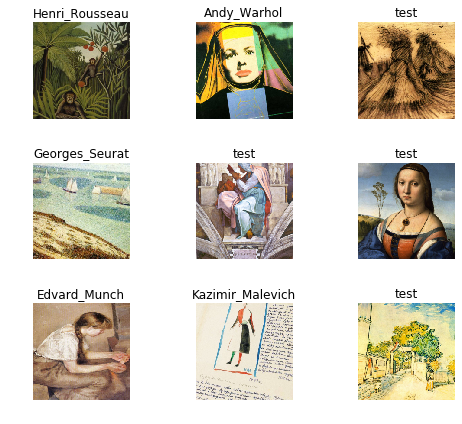

In [32]:
data.show_batch(rows=3, figsize=(7,6))

## 4. Playing with Model - accuracy

In [33]:
# learn = cnn_learner(data, models.resnet50, pretrained=False, metrics=accuracy)
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy)
print("Learn - Done")

Learn - Done


In [34]:
learn.model


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [35]:
start_time = time.time()
learn.lr_find()
print("--- %s mins ---" % ((time.time() - start_time)/60))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
--- 4.431972388426463 mins ---


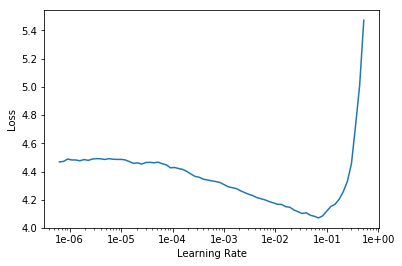

In [36]:
learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(4, 3e-3)
#learn.fit_one_cycle(4, 1e-01)

In [38]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,3.424408,2.964592,0.223030,05:55
1,3.014771,2.664442,0.256364,05:53


In [0]:
learn.unfreeze()
# learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))
# learn.fit_one_cycle(1, 1e-6)
learn.fit_one_cycle(2)

In [0]:
# learn.fit_one_cycle(20)

In [0]:
# Save the model
learn.save('simple-model')

In [0]:
# Load the model
learn.load('simple-model');

## 5. Playing with Model - error_rate

In [43]:
learn = cnn_learner(data, models.resnet50, pretrained=False, metrics=error_rate)
print("Learn - Done")

Learn - Done


In [44]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [45]:
start_time = time.time()
learn.lr_find()
print("--- %s mins ---" % ((time.time() - start_time)/60))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
--- 4.697199674447377 mins ---


## Inference

In [46]:
# Load submission file
sample_df = pd.read_csv(DATA_DIR/'sample_submission.csv')
sample_df.head()

,id,predicted_class
0,43de3c52-a0df-40fa-b10f-8d0db8c6ed36.jpg,Vincent_van_Gogh
1,501f0f8e-5bd2-465d-8774-ee14b8fc293e.jpg,Vincent_van_Gogh
2,164eb34f-31b9-42de-b3a8-4d75fd88558f.jpg,Vincent_van_Gogh
3,484857c2-534b-4099-814f-c66d64c06351.jpg,Vincent_van_Gogh
4,f656d82e-c9e7-436d-b7c6-4c33aab35ddf.jpg,Vincent_van_Gogh


In [0]:
# Generate test predictions
learn.data.add_test(ImageList.from_df(sample_df,DATA_DIR,folder='test/test'))

In [0]:
# Load up submission file
preds,y = learn.get_preds(DatasetType.Test)

In [49]:
# Convert predictions to classes
pred_classes = [data.classes[c] for c in list(preds.argmax(dim=1).numpy())]
pred_classes[:10]

['Joan_Miro',
 'Joan_Miro',
 'Joan_Miro',
 'Joan_Miro',
 'Joan_Miro',
 'Joan_Miro',
 'Joan_Miro',
 'Joan_Miro',
 'Joan_Miro',
 'Joan_Miro']

In [50]:
# Add the prediction
sample_df.predicted_class = pred_classes
sample_df.head()

,id,predicted_class
0,43de3c52-a0df-40fa-b10f-8d0db8c6ed36.jpg,Joan_Miro
1,501f0f8e-5bd2-465d-8774-ee14b8fc293e.jpg,Joan_Miro
2,164eb34f-31b9-42de-b3a8-4d75fd88558f.jpg,Joan_Miro
3,484857c2-534b-4099-814f-c66d64c06351.jpg,Joan_Miro
4,f656d82e-c9e7-436d-b7c6-4c33aab35ddf.jpg,Joan_Miro


In [51]:
# Save the submission file
sample_df.to_csv('submission2.csv',index=False)

from IPython.display import FileLink
FileLink('submission2.csv')

/content/submission2.csv

In [52]:
# Clean up (for commit)
!cp -R data/models models # Move the models out
!rm -rf data # Delete the data

cp: cannot stat 'data/models': No such file or directory
